# ATMOSPHERIC FIELD WORK

# NAME : NOAH BAMRADEN KOLOG

# INDEX: 4296920

In [294]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [295]:
# opening all 10 netcdf files 
ds_TOGO=xr.open_mfdataset('C://Users//asdf//Downloads//PYTHON CLASS - Jupyter Notebook_files//PERSIANN//*.nc')
ds_TOGO=ds_TOGO.where(ds_TOGO !=-99)
ds_TOGO

<xarray.Dataset>
Dimensions:   (datetime: 3288, lat: 22, lon: 10)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2000-05-19 2000-05-20 ... 2009-05-19
  * lon       (lon) float32 -0.25 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0
  * lat       (lat) float32 11.5 11.25 11.0 10.75 10.5 ... 7.0 6.75 6.5 6.25
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(3288, 22, 10), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue May 02 22:34:46 2023: cdo mergetime PERSIANN_Togo_2023-...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [296]:
#identifying the attributes
ds_TOGO.attrs#identifying dataset features
type(ds_TOGO)
#identifying dataset features
# checking coordinates and dimensions 
ds_TOGO.coords



Coordinates:
  * datetime  (datetime) datetime64[ns] 2000-05-19 2000-05-20 ... 2009-05-19
  * lon       (lon) float32 -0.25 0.0 0.25 0.5 0.75 1.0 1.25 1.5 1.75 2.0
  * lat       (lat) float32 11.5 11.25 11.0 10.75 10.5 ... 7.0 6.75 6.5 6.25

In [297]:
# checking for available variables 
ds_TOGO.data_vars

Data variables:
    crs      float64 1.0
    precip   (datetime, lat, lon) float32 dask.array<chunksize=(3288, 22, 10), meta=np.ndarray>

In [300]:
# assigning data to variable precip
da_TOGO = ds_TOGO.precip

# removing all missing values
da_TOGO = da_TOGO.where(da_TOGO !=-99)

In [301]:
# dataset type
type(ds_TOGO)

xarray.core.dataset.Dataset

In [302]:
# identifying data type
type(da_TOGO)

xarray.core.dataarray.DataArray

In [303]:
coords_TOGO=da_TOGO.sel(lon=1.0, lat=8.0, datetime=slice('2000','2009'))

# QUESTION 1

In [304]:
# MONTHLY RAINFALL TOTALS
Monthly_RR = coords_TOGO.groupby('datetime.month').sum('datetime')
Monthly_RR.to_series().reset_index()

,month,precip
0,1,205.329987
1,2,562.719971
2,3,1927.079956
3,4,3008.739990
4,5,2756.699951
5,6,1967.720093
6,7,1394.130005
7,8,1153.889893
8,9,1571.099976
9,10,910.320068


In [305]:
#  LONG TERM CLIMATOLOGIES 
Longterm_Climatology_RR= coords_TOGO.groupby('datetime.month').mean('datetime')
Longterm_Climatology_RR.to_series().reset_index()

,month,precip
0,1,0.735950
1,2,2.215433
2,3,6.931942
3,4,11.143481
4,5,9.845357
5,6,7.287852
6,7,4.996882
7,8,4.135806
8,9,5.818889
9,10,3.262796


# QUESTION 2

In [306]:
# computing Annual Totals
Annual_Totals_RR = coords_TOGO.resample(datetime='Y').sum('datetime')
Annual_Totals_RR.to_series().reset_index()

,datetime,precip
0,2000-12-31,1012.589966
1,2001-12-31,1507.079834
2,2002-12-31,2027.059814
3,2003-12-31,1893.410034
4,2004-12-31,1645.989990
5,2005-12-31,1581.280029
6,2006-12-31,1962.640015
7,2007-12-31,2107.169922
8,2008-12-31,1531.880005
9,2009-12-31,718.049988


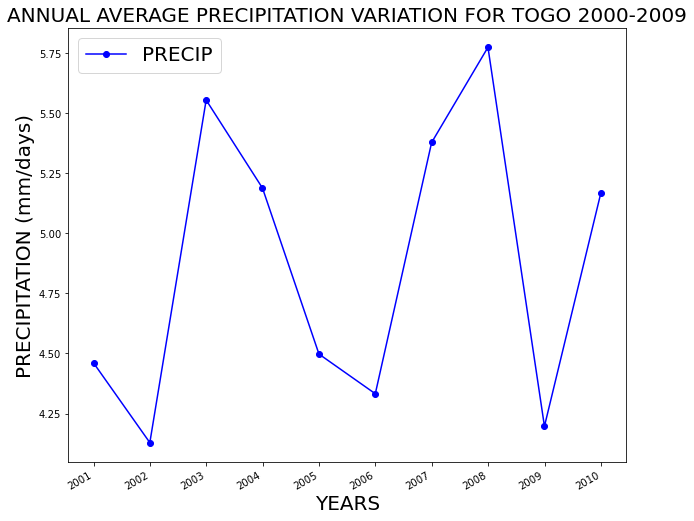

In [307]:
# Annual Average
Annual_Totals_RR= coords_TOGO.resample(datetime='1Y').mean('datetime')
Annual_Totals_RR.plot(color = 'b',marker='o', label='PRECIP')

barwidth = 0.3
plt.rcParams['figure.figsize']=[10,8]

# legend position
plt.legend(loc='upper left', fontsize=20)

# assigning names to Y-axis and X-axis respectivly
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')

plt.title('ANNUAL AVERAGE PRECIPITATION VARIATION FOR TOGO 2000-2009', fontsize=20, color='black')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

In [308]:
# Annual Average across Togo
Annual_Average_RR= coords_Tanzania.groupby('datetime.year').sum('datetime')
Annual_Average_RR.to_series().reset_index()

,year,precip
0,2000,1012.589966
1,2001,1507.079834
2,2002,2027.059814
3,2003,1893.410034
4,2004,1645.989990
5,2005,1581.280029
6,2006,1962.640015
7,2007,2107.169922
8,2008,1531.880005
9,2009,718.049988


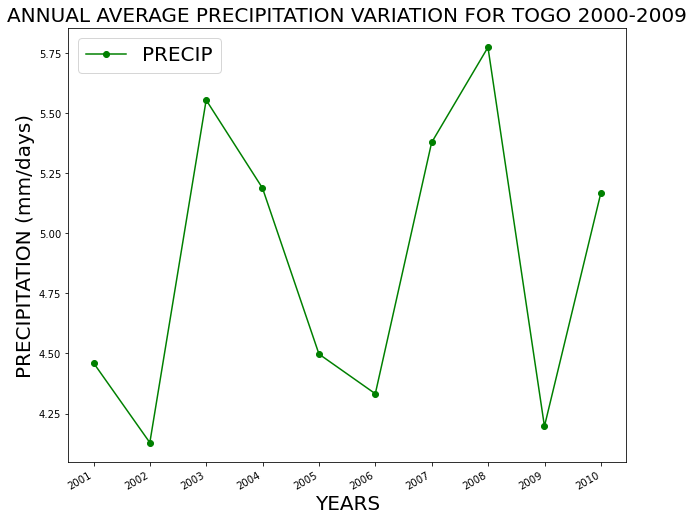

In [309]:
# Annual Average
Annual_Average_RR= coords_TOGO.resample(datetime='1Y').mean('datetime')
Annual_Average_RR.plot(color = 'g',marker='o', label='PRECIP')

barwidth = 0.2
plt.rcParams['figure.figsize']=[10,8]

# legend position
plt.legend(loc='upper left', fontsize=20)

# naming the Y-axis and X-axis respectively
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')

plt.title('ANNUAL AVERAGE PRECIPITATION VARIATION FOR TOGO 2000-2009', fontsize=20, color='black')
    
#plt.savefig('Annual_average_timeseries.png')
plt.show()

# QUESTION 3

In [310]:
Monthly_RR2 = coords_TOGO.groupby('datetime.month').sum()
Monthly_RR2

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 1.0
    lat      float32 8.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [311]:
#computing the number of dry Month(s)
#for precipitation <1mm
dry_CRR= da_TOGO.where(da_TOGO <1).sel(lon=1, lat=8, datetime=slice('2000','2009'))
dry_CRR=dry_CRR.where(dry_CRR !=-99)

dry_cmon=dry_CRR.groupby('datetime.month').count('datetime')
dry_cmon.to_series().reset_index()

,month,precip
0,1,265
1,2,199
2,3,127
3,4,107
4,5,126
5,6,133
6,7,145
7,8,159
8,9,113
9,10,180


In [338]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY MONTH(S) (RR<1mm)
#computing number of dry Month(s) 
#selecting precipitation <1mm
dry_RR= da_TOGO.where(da_TOGO <1)
dry_RR=dry_RR.where(dry_RR !=-99)

dry_mon=dry_RR.groupby('datetime.month').count('datetime')
dry_mon.to_series().reset_index()

# cartopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf
count=0


In [313]:
# COMPUTING THE NUMBER FOR WET MONTH(S)(RR>1mm)
#for precipitation >1mm
wet_CRR= da_TOGO.where(da_TOGO >=1).sel(lon=1, lat=8, datetime=slice('2000','2009'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').mean('datetime')
wet_cmon.to_series().reset_index()

,month,precip
0,1,14.270715
1,2,10.054910
2,3,12.650463
3,4,18.387363
4,5,17.813313
5,6,14.244817
6,7,10.272463
7,8,9.478666
8,9,9.925159
9,10,8.951111


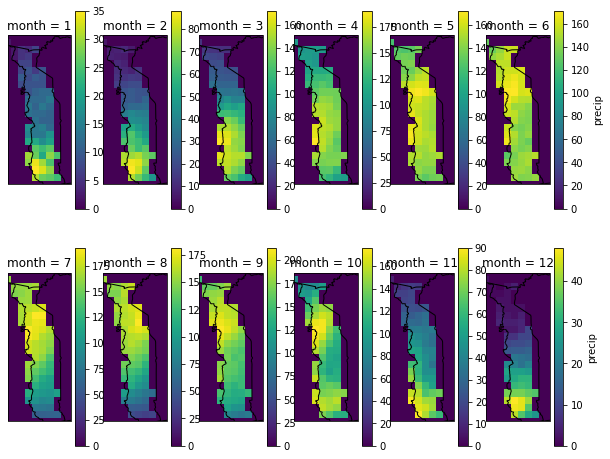

In [314]:
# SPATIAL PLOTS FOR THE NUMBER OF WET MONTH(S) (RR>=1mm)

#FOR precipitation >1mm
wet_RR= da_TOGO.where(da_TOGO >=1)
wet_RR=wet_RR.where(wet_RR !=-99)
wet_RR
wet_mon=wet_RR.groupby('datetime.month').count('datetime')
wet_mon.to_series().reset_index()
fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#wet_mon.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Months in wet_mon.month:
    count+=1
    ax=fig.add_subplot(2,6,count,projection=ccrs.PlateCarree())
    wet_mon[wet_mon.month==Months].plot()
    
    # PLOT FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([-0.25, 2.0, 6.25, 11.5])

In [317]:
#COMPUTING THE NUMBER OF DRY YEARS(RR<1mm)
#for precipitation <1mm
Annual_dry_RR= da_TOGO.where(da_TOGO <1).sel(lon=1, lat=8, datetime=slice('2000','2009'))
Annual_dry_RR
Annual_cdry=Annual_dry_RR.groupby('datetime.year').count('datetime')
Annual_cdry.to_series().reset_index()

,year,precip
0,2000,141
1,2001,251
2,2002,212
3,2003,204
4,2004,230
5,2005,229
6,2006,220
7,2007,225
8,2008,239
9,2009,81


In [318]:
# COMPUTING THE NUMBER OF WET YEAR(S) (RR>=1mm)
#for precipitation >1mm
Annual_wet_RR= da_TOGO.where(da_TOGO >=1).sel(lon=1, lat=8, datetime=slice('2000','2009'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').mean('datetime')
Annual_cwet.to_series().reset_index()

,year,precip
0,2000,11.604419
1,2001,13.055438
2,2002,13.142419
3,2003,11.640124
4,2004,11.970881
5,2005,11.535515
6,2006,13.438896
7,2007,14.915643
8,2008,12.013016
9,2009,12.276896


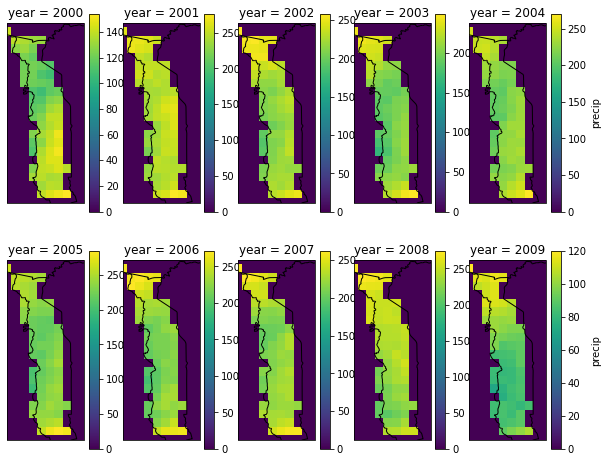

In [319]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY YEAR(S) (RR<1mm)
#for precipitation <1mm
Annual_dry_RR= da_TOGO.where(da_TOGO<1)
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').count('datetime')
Annual_dry

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#Annual_wet.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Years in Annual_dry.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_dry[Annual_dry.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent ([-0.25, 2.0, 6.25, 11.5])
    #grid=ax.gridlines()
    #grid.xlabels_bottom=True; grid.ylabel_left=True
    #grid.xformatter=LONGITUDE_FORMATTER
    #grid.yformatter=LONGITUDE_FORMATTER

#plt.savefig('(DRY)ANNUAL.png')
plt.show()

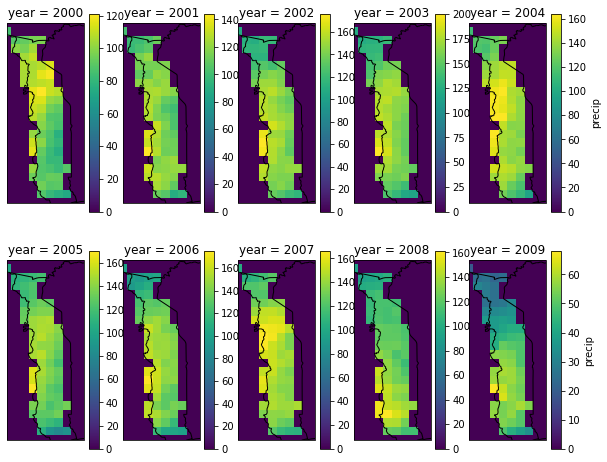

In [288]:
# SPATIAL PLOTS FOR THE NUMBER OF WET YEAR(S) (RR>=1mm)
#for precipitation >1mm
Annual_wet_RR= da_TOGO.where(da_TOGO >=1)
Annual_wet_RR
# sorting data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').count('datetime')
Annual_wet

fig=plt.figure()
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#Annual_dry.plot.contourf(x='lon',y='lat', col='month',col_wrap=6);
count=0
for Years in Annual_wet.year:
    count+=1
    ax=fig.add_subplot(2,5,count,projection=ccrs.PlateCarree())
    Annual_wet[Annual_wet.year==Years].plot()
    #ADDING FEATURES
    ax.coastlines(resolution='10m')
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.LAND)
    ax.add_feature(cf.OCEAN)
    ax.set_extent([-0.25, 2.0, 6.25, 11.5])
    #grid=ax.gridlines()
    #grid.xlabels_bottom=True; grid.ylabel_left=True
    #grid.xformatter=LONGITUDE_FORMATTER
    #grid.yformatter=LONGITUDE_FORMATTER

#plt.savefig('(WET)ANNUAL.png')
plt.show()

In [332]:
# selecting coordintes
coordinates_TOGO=ds_TOGO.sel(lon=1, lat=8, datetime=slice('2000','2009'))

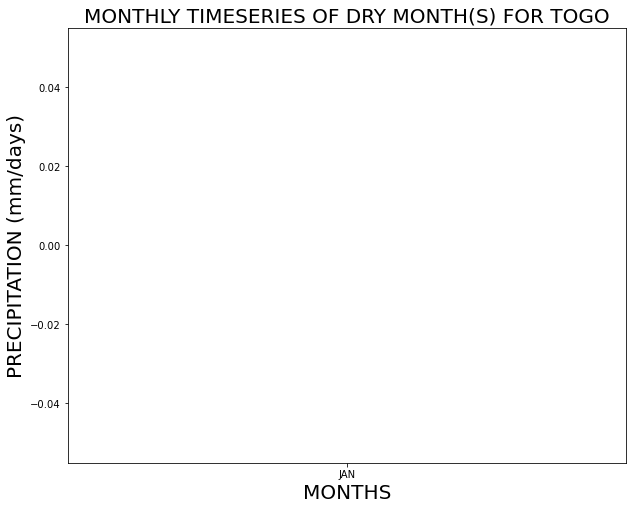

In [333]:
#the number of dry MONTH(S) TIMESERIES
#for precipitation <1mm
dry_RR= dry_cmon.where(dry_cmon <1)
dry_RR=dry_RR.where(dry_RR !=-99)
Months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEPT','OCT','NOV','DEC']

plt.plot(Months,dry_RR,color = 'brown',marker='o', label='PRECIP')
plt.title('MONTHLY TIMESERIES OF DRY MONTH(S) FOR TOGO', fontsize='20', color='black')
# naming the Y-axis and X-axis respectively
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('MONTHS', fontsize=20, color='black')
plt.savefig('MONTHLY (TIMESERIES(DRY MONTH).png')
plt.show()

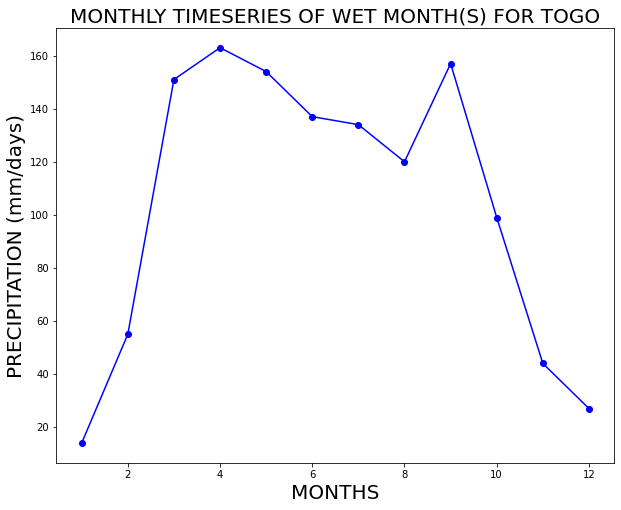

In [323]:
# TIMESERIES PLOT FOR WET MONTH(S)(RR>1mm)
#for precipitation >1mm
wet_CRR= da_TOGO.where(da_TOGO >=1).sel(lon=1, lat=8, datetime=slice('2000','2009'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').count('datetime')
wet_cmon.plot(color = 'b',marker='o', label='PRECIP')

plt.title('MONTHLY TIMESERIES OF WET MONTH(S) FOR TOGO', fontsize='20', color='black')
# naming the Y-axis and X-axis respectively
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('MONTHS', fontsize=20, color='black')

plt.show()

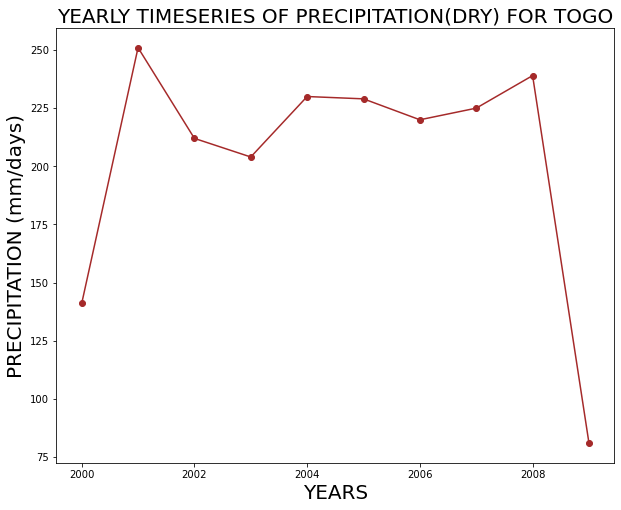

In [324]:
# ANNUAL TIMESERIES FOR THE NUMBER OF DRY (RR<1mm)
#for precipitation <1mm
Annual_cdry.plot(color = 'brown',marker='o', label='PRECIP');
plt.title('YEARLY TIMESERIES OF PRECIPITATION(DRY) FOR TOGO', fontsize='20', color='black')
# naming the Y-axis and X-axis respectively
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

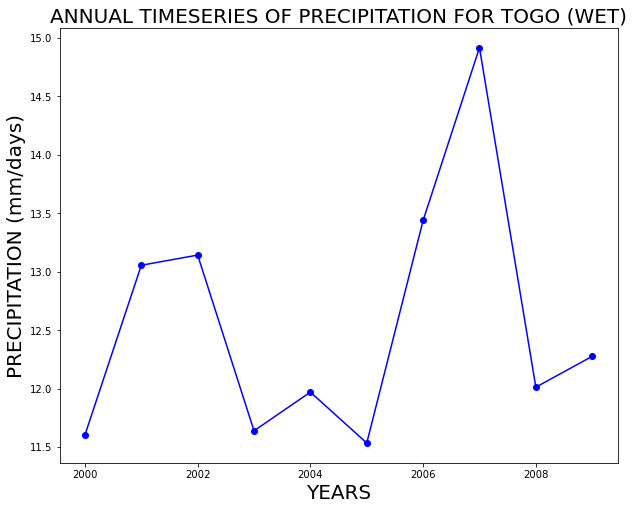

In [325]:
# COMPUTING THE NUMBER OF WET, ANNUALY(RR>=1mm)
#for precipitation >1mm

Annual_cwet.plot(color = 'b',marker='o', label='PRECIP')
plt.title('ANNUAL TIMESERIES OF PRECIPITATION FOR TOGO (WET)', fontsize='20', color='black')
# naming the Y-axis and X-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

# QUESTION 4

In [326]:
Coordinates_TOGO = ds_TOGO.sel(lon= 1,lat= 8,datetime = slice("2000","2009"))

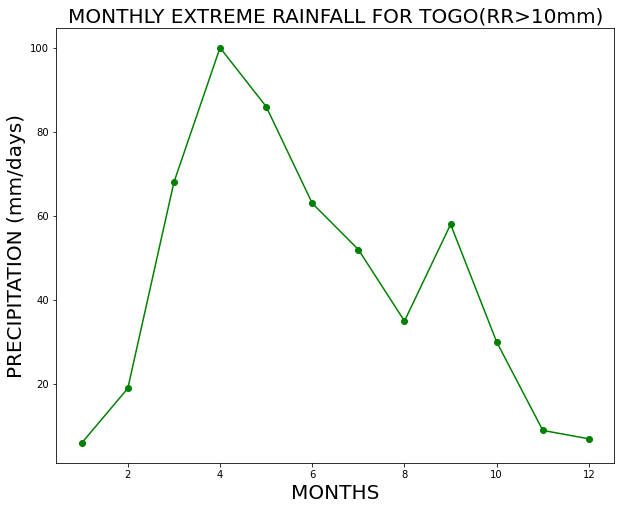

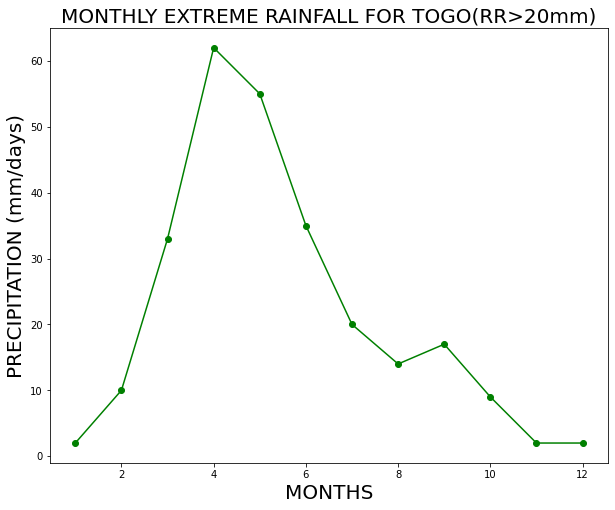

In [327]:
#MONTHLY TIMESERIES FOR THE NUMBER OF EXTREME PRECIPITATION (RR>10mm)-----
#for precipitation >10mm
coordinates_TOGO = ds_TOGO.sel(lon= 1,lat= 8,datetime = slice("2000","2009"))
dry_RR= coordinates_TOGO.where(coordinates_TOGO['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.month').count('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
dry1
plt.title('MONTHLY EXTREME RAINFALL FOR TOGO(RR>10mm)', fontsize='20', color='black')
# naming the Y-axis and X-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('MONTHS', fontsize=20, color='black')

plt.show()

#for precipitation >20mm
dry_RR= coordinates_TOGO.where(coordinates_TOGO['precip'] >20).precip
dry_RR
dry_RR.sel()
dry2=dry_RR.groupby('datetime.month').count('datetime')
dry2
dry2.plot(color = 'g',marker='o', label='PRECIP');
plt.title('MONTHLY EXTREME RAINFALL FOR TOGO(RR>20mm)', fontsize='20', color='black')
# naming the Y-axis and X-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('MONTHS', fontsize=20, color='black')
plt.savefig('MONTHLY EXTREME RR(20).png')
plt.show()

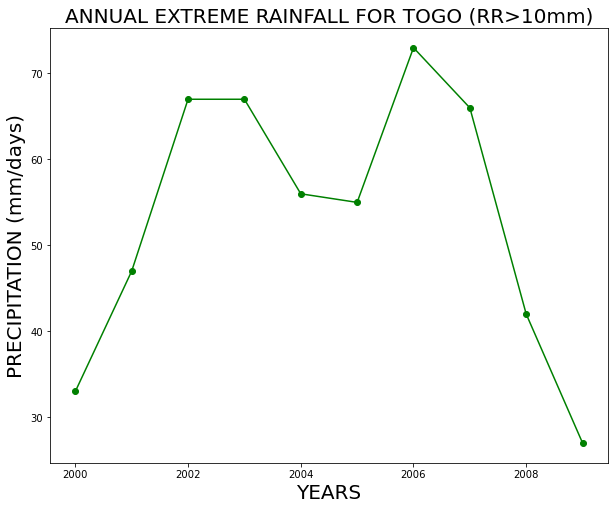

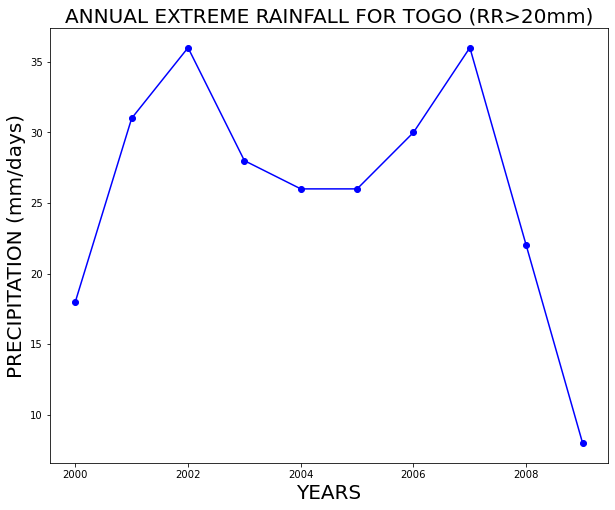

In [328]:
#YEARLY TIMESERIES FOR THE NUMBER OF EXTREME PRECIPITATION (RR>20mm)
#for precipitation >10mm
dry_RR= coordinates_TOGO.where(coordinates_TOGO['precip'] >10).precip
dry_RR
dry_RR.sel()
dry1=dry_RR.groupby('datetime.year').count('datetime')
dry1.plot(color = 'g',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR TOGO (RR>10mm)', fontsize='20', color='black')
# naming the Y-axis and X-axis
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')
plt.savefig('ANNUAL (TIMESERIES(DRY).png')
plt.show()

#for precipitation >20mm
dry_RR= coordinates_TOGO.where(coordinates_TOGO['precip'] >20).precip
dry_RR
dry1=dry_RR.groupby('datetime.year').count('datetime')
dry1.plot(color = 'b',marker='o', label='PRECIP');
plt.title('ANNUAL EXTREME RAINFALL FOR TOGO (RR>20mm)', fontsize='20', color='black')
# naming the Y-axis and X-axis respectively
plt.ylabel('PRECIPITATION (mm/days)', fontsize=20, color='black')

plt.xlabel('YEARS', fontsize=20, color='black')
#plt.savefig('ANNUAL (TIMESERIES(WET).png')
plt.show()

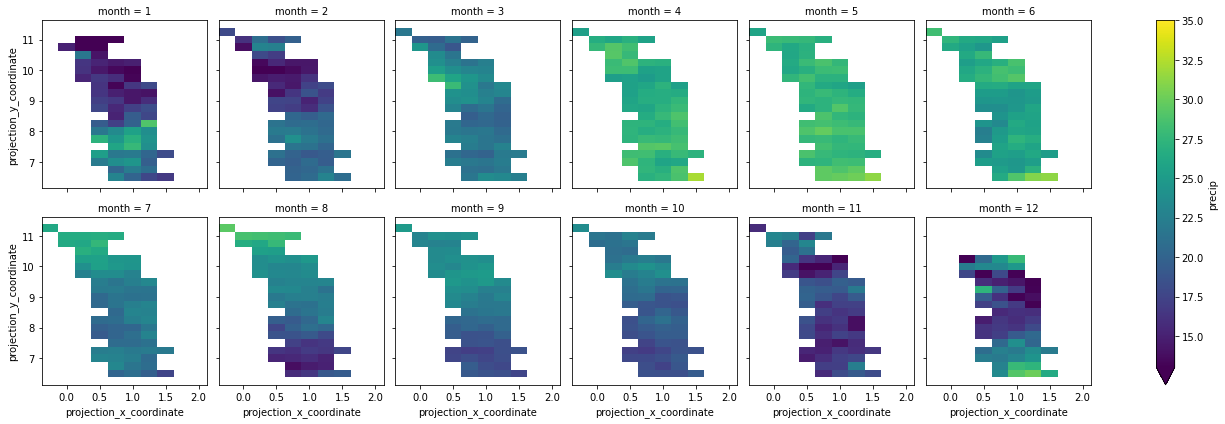

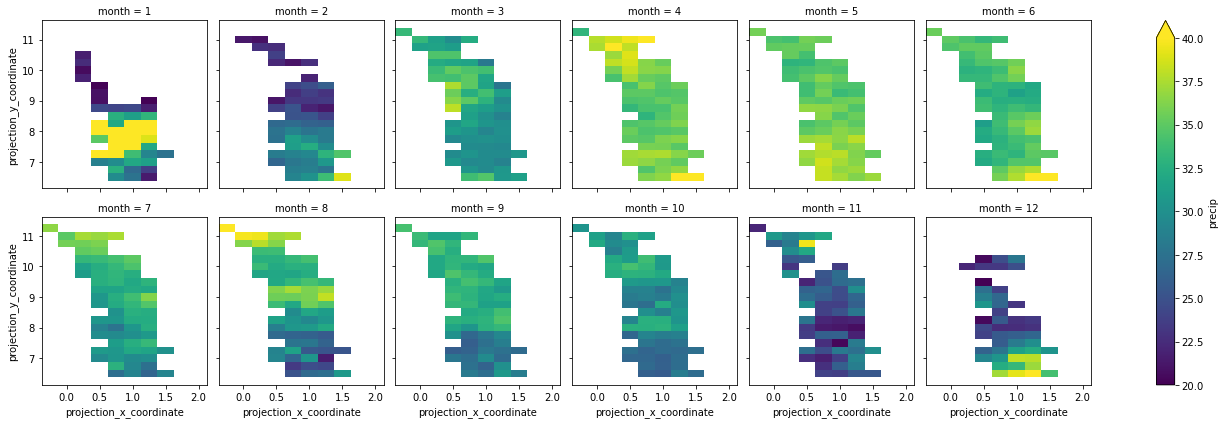

In [329]:
#for precipitation >10mm
dry_RR= ds_TOGO.where(ds_TOGO['precip'] >10).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=35, vmin=13, col_wrap=6, col='month');

plt.show()

#for precipitation >10mm
dry_RR= ds_TOGO.where(ds_TOGO['precip'] >20).precip
dry_RR

dry1=dry_RR.groupby('datetime.month').mean('datetime')[:,:,:]
dry1.plot(vmax=40, vmin=20, col_wrap=6, col='month');
#ADDING FEATURES
ax.coastlines(resolution='10m')
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.set_extent([-0.25, 2.0, 6.25, 11.5])

plt.show()

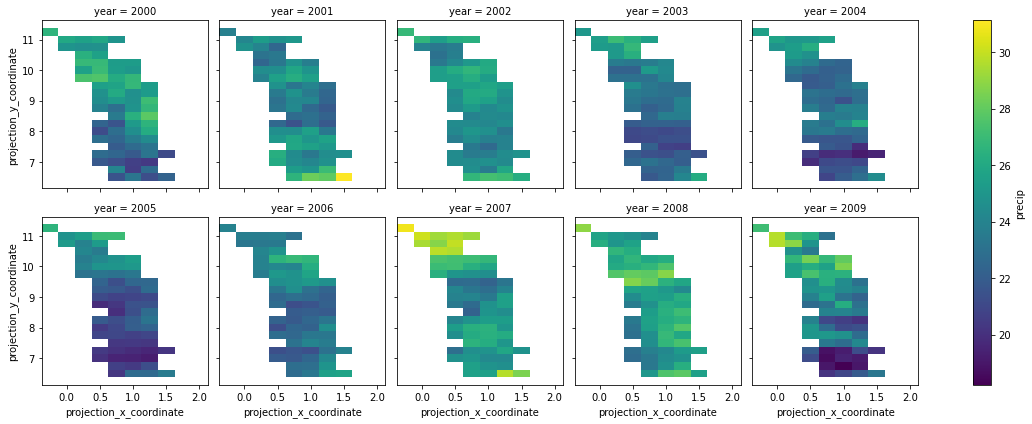

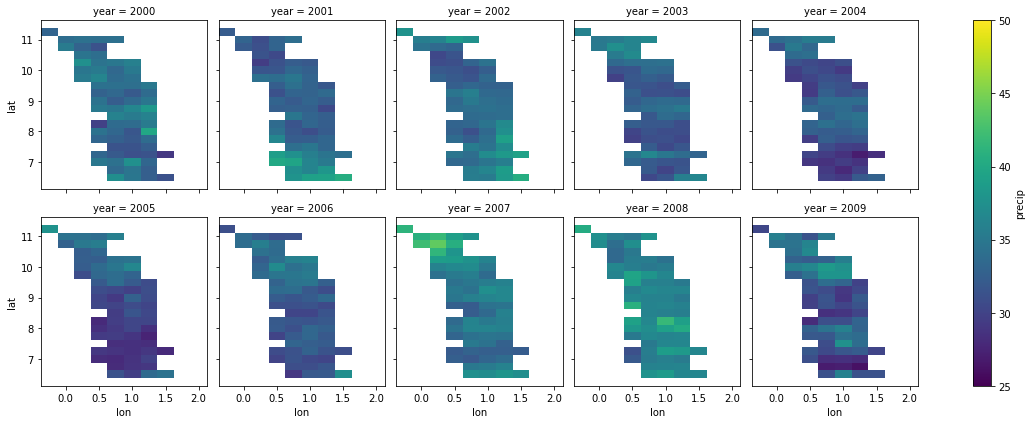

In [283]:
#selecting precipitation >10mm
Annual_dry_RR= ds_TOGO.where(ds_TOGO['precip'] >10).precip
Annual_dry_RR
Annual_dry=Annual_dry_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_dry.plot(col_wrap=5, col='year')
#plt.savefig('R>10 Spatial ANNUAL.png')
plt.show()

#selecting precipitation >20mm
Annual_wet_RR= da_Tanzania.where(da_Tanzania >=20)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').mean('datetime')[:,:,:]
Annual_wet.plot(vmax=50, vmin=25, col_wrap=5, col='year')
#plt.savefig('R>20 Spatial ANNUAL.png')

#ADDING FEATURES
ax.coastlines(resolution='10m')
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.set_extent([-0.25, 2.0, 6.25, 11.5])
    
plt.show()